# Case study on Supervised learning
## Do the following in the iris dataset.
### 1. Read the dataset to the python environment.
### 2. Do necessary pre-processing steps.
### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

### 1. Read the dataset to the python environment.

In [74]:
from google.colab import files
uploaded = files.upload()

Saving iris.xls to iris (1).xls


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_set1=pd.read_excel('iris.xls')
data_set1

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### The above Table shows the classification of IRIS as per the Sepal and Petal -the Length and Width

### 2. Do necessary pre-processing steps.

In [144]:
data_set1.shape

(150, 5)

In [145]:
data_set1.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [146]:
data_set1.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### The above details are some of the basic details about the dataset. It has 150 rows and 5 columns. The Statistical details such as Mean, Standard Deviation, percentiles etc are as described in the above Table.
#### Also, the data set is not a clean data set. Some missing values are identified, which requires some preprocessing

In [147]:
data_set1.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#### From the above result, null values are identified in the fields SL,SW and PL. Now, we will check for the data type of the fields

In [148]:
data_set1.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

#### The fields SL, SW and PL are float fields. So, we have numerical data missing

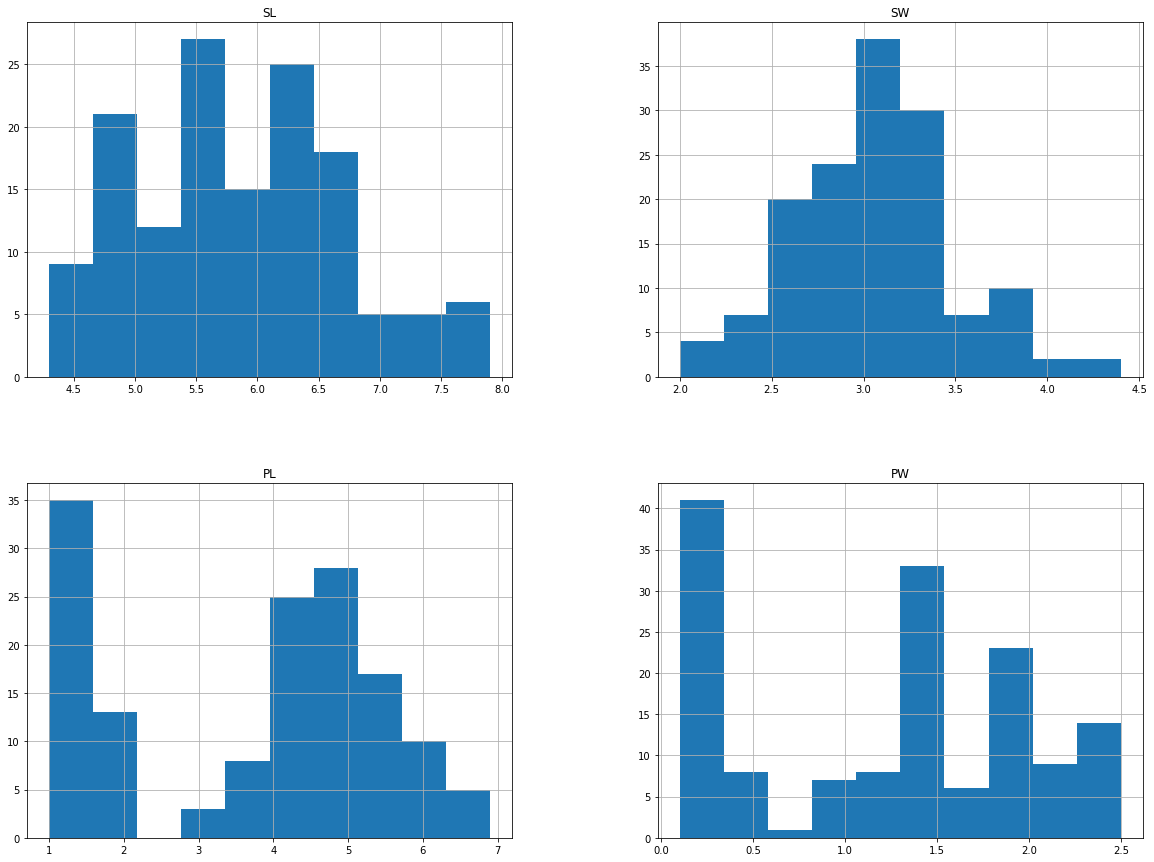

In [149]:
freqgraph=data_set1.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [150]:
data_set1['SL']=data_set1['SL'].fillna(data_set1['SL'].median())
data_set1['PL']=data_set1['PL'].fillna(data_set1['PL'].median())
data_set1['SW']=data_set1['SW'].fillna(data_set1['SW'].median())
data_set1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Thus, all the null values are handled. Now, we can check for outliers

Text(0.5, 1.0, 'Box plot of SL')

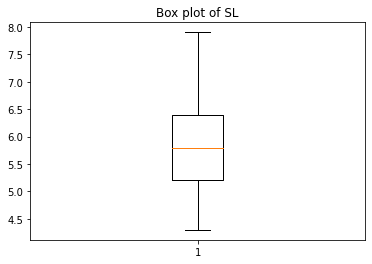

In [151]:
plt.boxplot(data_set1['SL'])
plt.title('Box plot of SL')

Text(0.5, 1.0, 'Box plot of PL')

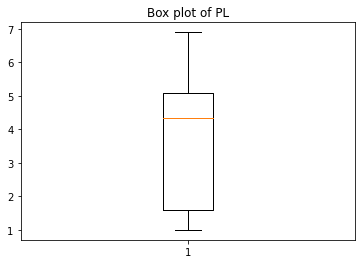

In [152]:
plt.boxplot(data_set1['PL'])
plt.title('Box plot of PL')

Text(0.5, 1.0, 'Box plot of PW')

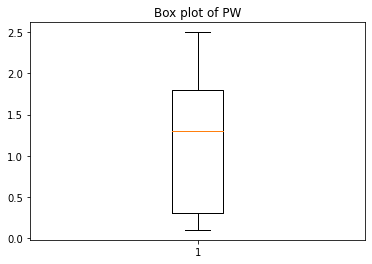

In [153]:
plt.boxplot(data_set1['PW'])
plt.title('Box plot of PW')

Text(0.5, 1.0, 'Box plot of SW')

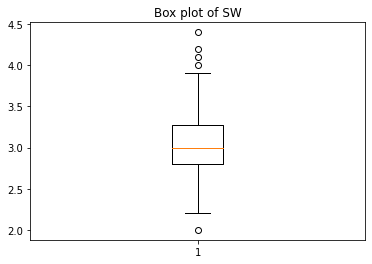

In [154]:
plt.boxplot(data_set1['SW'])
plt.title('Box plot of SW')

#### Only SW field has outliers. Now we may need to handle the outlier values

In [155]:
Q1=np.percentile(data_set1['SW'],25,interpolation='midpoint')
Q2=np.percentile(data_set1['SW'],50,interpolation='midpoint')
Q3=np.percentile(data_set1['SW'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

Q1 =  2.8
Q2 =  3.0
Q3 =  3.25


In [156]:
IQR = Q3-Q1
low_lim = Q1-(1.5*IQR)
up_lim = Q3+(1.5*IQR)
print ('IQR =',IQR)
print ('Lower limit =',low_lim)
print ('Upper limit =',up_lim)
outlier = []
for x in data_set1['SW']:
  if ((x > up_lim) or (x < low_lim)): 
    outlier.append(x)
outlier

IQR = 0.4500000000000002
Lower limit = 2.1249999999999996
Upper limit = 3.9250000000000003


[4.0, 4.4, 4.1, 4.2, 2.0]

#### To find the index of the outliers:

In [157]:
ind1 = data_set1['SW'] < low_lim
data_set1.loc[ind1].index

Int64Index([60], dtype='int64')

In [158]:
ind1=data_set1['SW'] > up_lim
data_set1.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

#### Now, the above outlier indexes are to be dropped

In [159]:
data_set1.drop([14,15,32,33,60],inplace=True)


Text(0.5, 1.0, 'Box plot of SW')

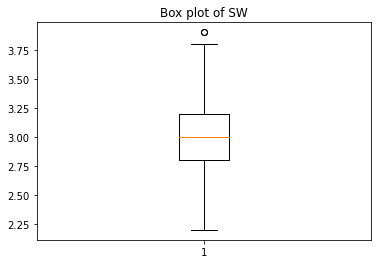

In [160]:
plt.boxplot(data_set1['SW'])
plt.title('Box plot of SW')

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [161]:
data_set1['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

In [162]:
data_set1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [163]:
y=data_set1['Classification']
X=data_set1.drop(['Classification'],axis=1)
X.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#### KNN model

In [165]:
from sklearn.neighbors import KNeighborsClassifier
acc_values =[]
neighbors =np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors =k, metric='minkowski')
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)
acc_values  

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

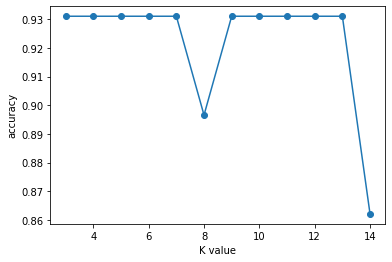

In [166]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K value')
plt.ylabel('accuracy')

#### Accuracy is highest for K values upto 7 and for K values from 9 to 13

In [167]:
classifier =KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred,average='micro'))
print('Recall is:', recall_score(y_test,y_pred,average='micro'))
print('F1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9310344827586207
Precision is: 0.9310344827586207
Recall is: 0.9310344827586207
F1 score is: 0.9310344827586207


In [168]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [169]:
### check standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [170]:
### Check KNN again
acc_values =[]
neighbors =np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors =k, metric='minkowski')
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)
acc_values 

[0.9310344827586207,
 0.8620689655172413,
 0.896551724137931,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413,
 0.8620689655172413]

Text(0, 0.5, 'accuracy')

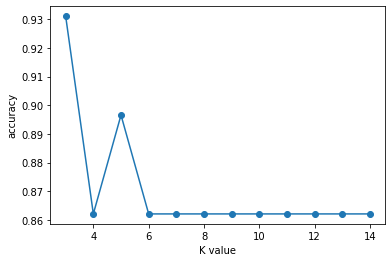

In [172]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K value')
plt.ylabel('accuracy')

In [173]:
classifier =KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test,y_pred,average='micro'))
print('Recall is:', recall_score(y_test,y_pred,average='micro'))
print('F1 score is:', f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9310344827586207
Precision is: 0.9310344827586207
Recall is: 0.9310344827586207
F1 score is: 0.9310344827586207


#### Thus, Accuracy is marked as 93.10%

In [174]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

#### Using Decision tree

In [175]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [176]:
y_pred=dt_model.predict(X_test)
print('Accuracy on Decision Tree model is', accuracy_score(y_test, y_pred))

Accuracy on Decision Tree model is 0.896551724137931


#### Thus, the accuracy using Decision Tree is 89.65%

In [177]:
 confusion_matrix(y_test,y_pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]])

### Using SVM

In [178]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [179]:
y_pred = svm_linear.predict(X_test)
print('Accuracy on SVM model is', accuracy_score(y_test, y_pred))

Accuracy on SVM model is 0.9310344827586207


#### Thus, using SVM model, the accuracy is shown as 93.10%

### Random Forest Algorithm

In [181]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 0.8620689655172413


#### Accuracy is found to be 86.20%

#### Thus, using the above classification models, it is seen that KNN and SVM model shows more accuracy of 93.10%